In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
NumPy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.2
/kaggle/input/imdb-datasets/imdb_top_1000.csv
/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [3]:
path = '../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv'
df = pd.read_csv(path, delimiter=',')
df.shape

(1000, 16)

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df['Certificate'].count()

899

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
df2=df.assign(Star_Cast=lambda x: x.Star1 + ", " + x.Star2 + ", " + x.Star3 + ", " + x.Star4)
print(df2)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

In [9]:
df2=df2.rename(columns={'Series_Title':'Movie_Name'})

In [10]:
df2.head()

,Poster_Link,Movie_Name,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Star_Cast
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


In [11]:
df2['Gross']=df2['Gross'].str.replace(',','')
df2['Gross'] = df2['Gross'].replace(np.nan, 0)
df2['Gross'] = df2['Gross'].astype(int)

In [12]:
df2.head()

,Poster_Link,Movie_Name,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Star_Cast
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


In [13]:
top_gross = df2.sort_values(['Gross'], ascending = False)
top_gross = top_gross[['Movie_Name','Gross']]
top_gross.head(10)

,Movie_Name,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225
59,Avengers: Endgame,858373000
623,Avatar,760507625
60,Avengers: Infinity War,678815482
652,Titanic,659325379
357,The Avengers,623279547
891,Incredibles 2,608581744
2,The Dark Knight,534858444
582,Rogue One,532177324
63,The Dark Knight Rises,448139099


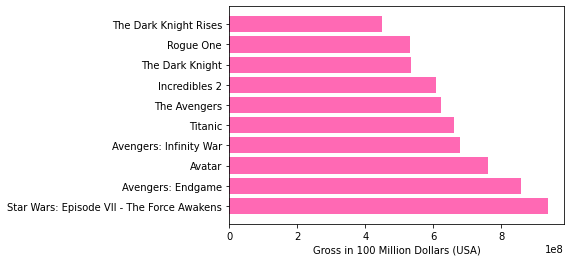

In [14]:
x=top_gross.head(10)['Movie_Name']
y=top_gross.head(10)['Gross']
plt.xlabel('Gross in 100 Million Dollars (USA)')
plt.barh(x, y, color = "hotpink")
plt.show()

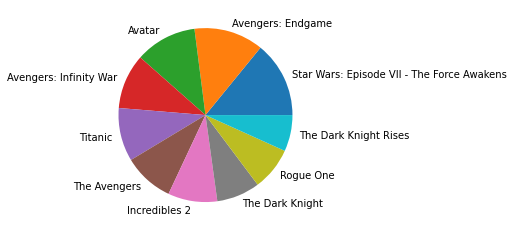

In [15]:
z = top_gross.head(10)['Gross']
mylabels = top_gross.head(10)['Movie_Name']

plt.pie(y, labels = mylabels)
plt.show() 

### Star Wars : Episode VII - The Force Awakens earned the largest among the top 10 box office grossers.

### Avengers Endgame being world highest grossers, has ranked 2nd in top 10 US Box office grossers.

In [16]:
top_voted = df2.sort_values(['IMDB_Rating'], ascending = False)
top_voted = top_voted[['Movie_Name','IMDB_Rating','Meta_score']]
top_voted.head(10)

,Movie_Name,IMDB_Rating,Meta_score
0,The Shawshank Redemption,9.3,80.0
1,The Godfather,9.2,100.0
2,The Dark Knight,9.0,84.0
3,The Godfather: Part II,9.0,90.0
4,12 Angry Men,9.0,96.0
5,The Lord of the Rings: The Return of the King,8.9,94.0
6,Pulp Fiction,8.9,94.0
7,Schindler's List,8.9,94.0
10,The Lord of the Rings: The Fellowship of the Ring,8.8,92.0
11,Forrest Gump,8.8,82.0


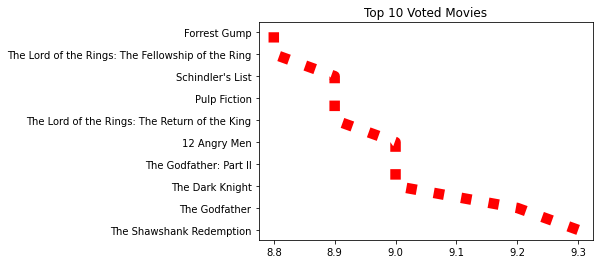

In [17]:
z = top_voted.head(10)['IMDB_Rating']
mylabels = top_voted.head(10)['Movie_Name']

plt.title("Top 10 Voted Movies")
plt.plot(z, mylabels, linestyle='dotted', color='red', linewidth = '10.5')
plt.show() 

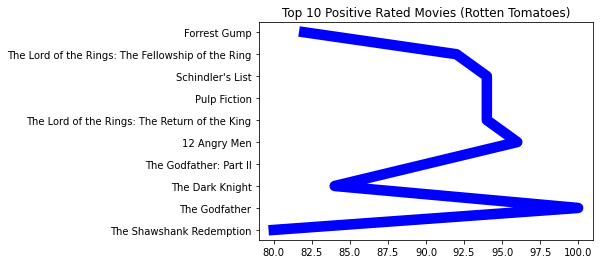

In [18]:
f = top_voted.head(10)['Meta_score']
mylabels = top_voted.head(10)['Movie_Name']

plt.title("Top 10 Positive Rated Movies (Rotten Tomatoes)")
plt.plot(f, mylabels, color='blue', linewidth = '10.5')
plt.show() 